In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

from numpy.random import permutation
# there is a permutation function we need from numpy.random

import matplotlib.colors as pltco # A package to help with coloring plots

# Machine Learning

Machine learning is the development of algorithms to either assist with making decisions from data, or in many cases to automate decision process.

Broadly speaking machine learning falls into two categories:

- *supervised learning* is where the algorithm is built from a training set of data that includes the correct result.
- *unsupervised learning* is where the algorithm attempts to deduce the deicision without knowing about a correct result.

We will spend most of class discussing supervised learning techniques. If time allows we will look at some unsupervised learning problems.

## Scikit-learn 

The package we will be using is [Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). This is a nice package that integrates well with Pandas, Numpy, and Seaborn. Note that there are other tools, Tensor Flow and Weka, which we will not cover, but you may be interested in following up with them. CS 454 in the Spring 2021 semester will use Weka and you may be interested in that course (contact Christopher Harris). 

Many of the algorithms in Scikit-Learn use really basic mathematics, so we will be able to do a surprising amount. However there are algorithms in the package that use very sophisticated ideas and these we will skip. In some cases the algorithm uses basic ideas, but the reasons we know it will work get very complicated. We will do what we can in the time we have.

## Which Algorithm to Use

You may start to be gathering that Machine Learning is a big landscape. There are a multitude of algorithms and methods, and each algorithm usually has some parameters. The choice of algorithm and parameters is really still something of an art. My best advice is to work as many problems as you can to build up some sense of what works in different situations. 

We will touch on this later, but it bears frequent repeating. A sophisticated model will be:

- Likely hard to explain to someone else;
- and might be responding too much to the training data.

We will see examples of this happening but the punch line is that you should default to the simplest model that passes your tests. 

Also worth reminding you to keep in mind the consequences for mistakes in determining what tests to use.



## Supervised Learning

Supervised learning can be further divided into two types:

- Classification:  Determining from the features the value of a categorical variable.
- Regression: Determining from the features the value of a numerical variable.

Let's start with a classification problem: PENGUINS!

In [2]:
penguins_url = 'https://drive.google.com/uc?export=download&id=1-SiGKvihMs9sP2I2FZd-sVRm-VnZFihi'

# This dataset is a .csv file (a type of spreadsheet) and so we can read it directly into a pandas DataFrame using 
# read_csv.

penguins_data = pd.read_csv(penguins_url)
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


What we would like to do is to use the variables (or a subset of the variables) to determine the spcecies of a Penguin. 

For example, taking the bill length and flipper length:

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

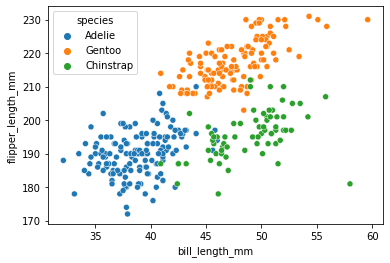

In [4]:
sns.scatterplot(data=penguins_data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Testing and Training

So let's pause before we dive into the first example. What we are going to try and do is develop a method of taking the *bill length* and *flipper length* of a penguin and then deciding whether it is an Adelie, Gentoo, or Chinstrap penguin. We have this data that tells us for some penguins what the result is. 

However we need a way to try and understand how close we came to a correct classifier. I.e. we need some way to test the performance of our algorithm. 

What we can do is reserve part of our dataset to use for testing the result, and only use a portion of it for training the algorithm. 

What makes this work is that the nature of data has changed and we now typically expect to have lots of it and can afford to sequester a subset of it to use for testing.

### Graphing the results

A brief word on graphing the result. It is instructive as we do this to have some graphical images to make it clear what we are doing. However the power of these algorithms is that they can work with LOTS of features, the problem is that graphing with more than two features and our result is a big challenge. So we'll do examples of how to do this using just two features and then if there is time lift that up to a larger set of features at the end.

### Let's get started with our first Example:  Classification

In [4]:
temp = penguins_data.loc[:, ['bill_length_mm', 'flipper_length_mm', 'species']].dropna()
# You should deal with na values first; either by dropping them or by devising a method to 
# fill them in.


# the functions in scikit-learn all work with numpy arrays 

# X is our input features
X = np.array(temp.loc[:, ['bill_length_mm', 'flipper_length_mm']])


# y is our output feature
y = np.array(temp.loc[:, 'species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2}))

# Note that these need to be numpy.arrays and so we have to recode string variables to
# be represented by numerical values.


At this point the inputs X and outputs y are separated. One thing we need to remember then is that any operations we do shuffling the rows of X, the same shuffle must be applied to y or we will break the relationship between the two.

In [5]:
# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

Scikit-learn contains a selection of functions for building and using the classifies (and regressors). These (like with seaborn) are structured so that they have similar parameters and structures. We will work today with one called the K-Nearest Neighbors algorithm.

### K-Nearest Neighbors

K-nearest neighbors is going to classify a particular coordinate (bill length, flipper length) as one of the three species of penguins by asking out of the k nearest neighbors (for some integer k) what the majority species is.

Let's do an example and then discuss it:

In [37]:
# We need a function to display the results
# I am defining it here. Note that this assumes we only have two features for our inputs.

# Note I am not going to ask you to write functions like this

def plot_cat_model(clf, X_train, y_train, X_test, y_test):
    
    h = 0.2 # Mesh Size
    
    # Make a mesh and then plot the decision boundary. To do that we assign a 
    # color to teach point in the mesh.
    # This tries to gets the boundaries for the box to draw. You may have to adjust 
    # this min and max values in some cases.
    xx_min, xx_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 5
    yy_min, yy_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 5
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), 
                        np.arange(yy_min, yy_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # you can adjust the output figure size here
    plt.figure(figsize=(8, 6))
    
    # define the colors - note we need a color for each answer in our output
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # plot the classification
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # plot the training set
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, marker='o')
    
    # plot the testing set
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+')
    
    # Print out the score results for the classifier also
    print('Training Score: {}'.format(clf.score(X_train, y_train)))
    print('Testing Score: {}'.format(clf.score(X_test, y_test)))

In [38]:
# Load the classifier form scikit-learn

from sklearn.neighbors import KNeighborsClassifier

# note we use from ___ import ___ because sklearn is such a large package.

So now we build the actual model. Note again that all of the models in scikit-learn are built basically the same way. They have .fit(), .predict(), and .score() methods.

You can get help about specific models by looking them up.

In [39]:
clf1 = KNeighborsClassifier(n_neighbors=1) # Define the model
clf1.fit(X_train, y_train); # Train the model

Not every model will fit or train as fast. K-Nearest Neighbors is a specifically easy to train model and so it happens relatively fast.

clf1 is now a predictor and we can use it to classify penguins. If we pass it a bill_length and flipper_length it will produce a 0, 1, or 2 giving us the predicted species:

In [40]:
clf1.predict( np.array([[40, 210]]) )

array([1])

Okay fine. But even better, because we only have two features we are using, we can plot the entire result:

Training Score: 1.0
Testing Score: 0.9117647058823529


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


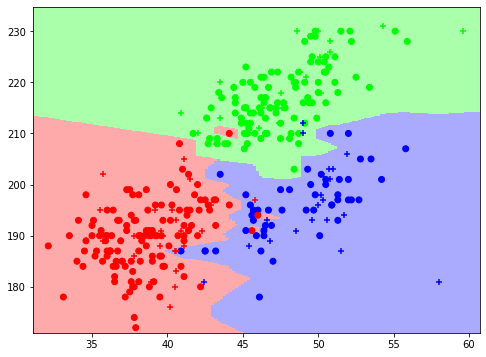

In [41]:
plot_cat_model(clf1, X_train, y_train, X_test, y_test)

So a few comments:

- First because we are building the testing and training sets use a random shuffle, every time we run this we will get a different result. In fact you know what the idea is:  We should run this over and over and try to get a sense of how much the prediction changes. We will come back to this idea in a future class. Just for now be aware that if we run this again we should expect things to move a little.

- Second:  Note we have used the .score() method to produce some *Error* values. Score is asking the model to make a prediction for the input X, and then compare it with the output y. For classification the score is:
$$ 1 - \mbox{the proportion of incorrect classifications} $$

- Note that we get a separate scores. We get one for the training set, which measures how good our method did at predicting the training set after being trained to it. We expect this to usually be close to 1.

- The second score is the one we really care about. This is the score on the testing set. We have applied the model we trained to data it has not seen yet. We do not expect this to typically do better than the training score. While our goal is in a sense to get this number as close as we can to 1, what we really want to use it for is to understand how good we expect our model to perform.

### Nearest Neighbors with k=1

Okay so our result with nearest neighbors k=1 is classifying points in the two dimensional region as one of the three types of penguins based on the type of the penguin from the training set that is closest. 

This explains why we will always get a training score of 1. 

Let's see what happens if we increase the number of neighbors:

Training Score: 0.9744525547445255
Testing Score: 0.9411764705882353


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


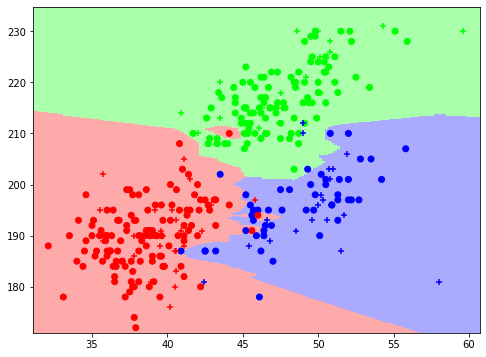

In [44]:
clf2 = KNeighborsClassifier(n_neighbors=2) # Define the model
clf2.fit(X_train, y_train); # Train the model
plot_cat_model(clf2, X_train, y_train, X_test, y_test) # Plot the result

### Working with more features

So the methods work with multiple features, but it becomes harder to visualize what is happening. 

We hope that adding features improves the performance. However.  Overfitting becomes a real concern. If our model is responding to errors in the training set, it will show up as decreased scores on the testing sets. We are particularly worried about models (like KNN) that allow the predictor a high degree of flexibility. Rigid models (which we will do some examples of next week) can sometimes perform better by avoiding overfitting.

In [45]:
penguins_data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [47]:
temp = penguins_data.loc[:,  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']].dropna()

y = np.array(temp.loc[:, 'species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2}))
X = np.array(temp.loc[:, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [65]:
# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [74]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train); # Train the model

In [75]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9558823529411765)

# Looking Ahead

Next week what we will do is develop a bootstrapping and cross vallidation procedure for testing models and determining the best choices of parameters (in this case the number of neighbors). 

We will then look at other classifier models. 

Then we will do the same steps for regression models.